# Generate a new graph

category      FOOD  SERVICE  GENERAL  AMBIENCE  PRICE
name                                                 
Gerestaurant   573      361      247       180     77
Students       432      335      306       149     66
Crowdworkers   437      338      293       142     72
LLM            458      315      272       145     70
Experts        441      329      249       156     69


C:\Users\nikla\AppData\Local\Temp\ipykernel_18408\3733234667.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("Set3", pivot_df.shape[1]).colors


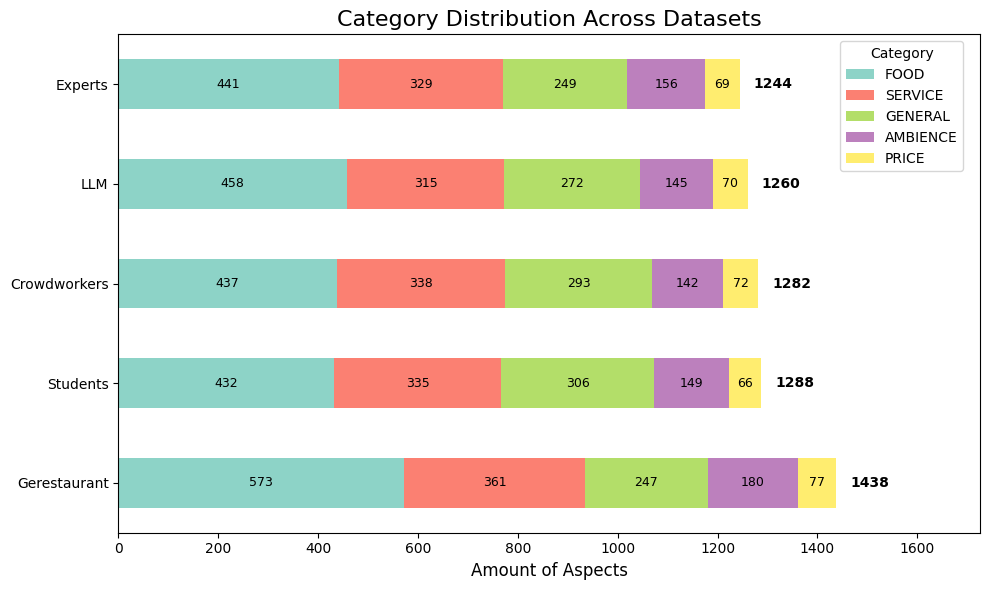

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load Excel
file_path = "acsa_dataset_comparison.xlsx"
df = pd.read_excel(file_path)

# Drop total rows
df = df[df["category"] != "Total"]
df = df[df["name"] != "Students"]
df = df[df["name"] != "students"]
# Pivot so that categories become stacked segments
pivot_df = df.pivot(index="name", columns="category", values="total")

# Optional: rename datasets and categories
dataset_names = {"crowd": "Crowdworkers",
                 "llm": "LLM", "experts": "Experts", "students_redo": "Students", "gerestaurant": "Gerestaurant"}
category_names = {
    "ambiente": "AMBIENCE",
    "essen": "FOOD",
    "gesamteindruck": "GENERAL",
    "preis": "PRICE",
    "service": "SERVICE"
}

pivot_df = pivot_df.rename(index=dataset_names, columns=category_names)

# Sort categories and datasets by their totals
pivot_df = pivot_df[pivot_df.sum().sort_values(ascending=False).index]
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]
print(pivot_df)
colors = cm.get_cmap("Set3", pivot_df.shape[1]).colors  
# Plot stacked horizontal bar chart
ax = pivot_df.plot(
    kind="barh",
    stacked=True,
    figsize=(10, 6),
    color=colors
)

# Max value for axis extension
max_val = pivot_df.sum(axis=1).max()

# Add numbers inside bars
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=9)

# Add totals at the end of bars
for i, total in enumerate(pivot_df.sum(axis=1)):
    ax.text(
        total + max_val * 0.02,  # dynamic offset (2% of max value)
        i,
        str(total),
        va='center',
        fontsize=10,
        fontweight='bold'
    )

# Styling
plt.xlim(0, max_val * 1.2)
plt.title("Category Distribution Across Datasets", fontsize=16)
plt.xlabel("Amount of Aspects", fontsize=12)
plt.ylabel("")
plt.xticks(rotation=0)
plt.legend(title="Category", bbox_to_anchor=(0.83, 1), loc="upper left")
plt.tight_layout()
plt.savefig("category_distribution_acsa.pdf", bbox_inches="tight")
plt.show()


,positiv,negativ,neutral
name,,,
Gerestaurant,783,594,61
Students,686,541,61
Crowdworkers,690,524,68
LLM,670,515,75
Experts,674,514,56


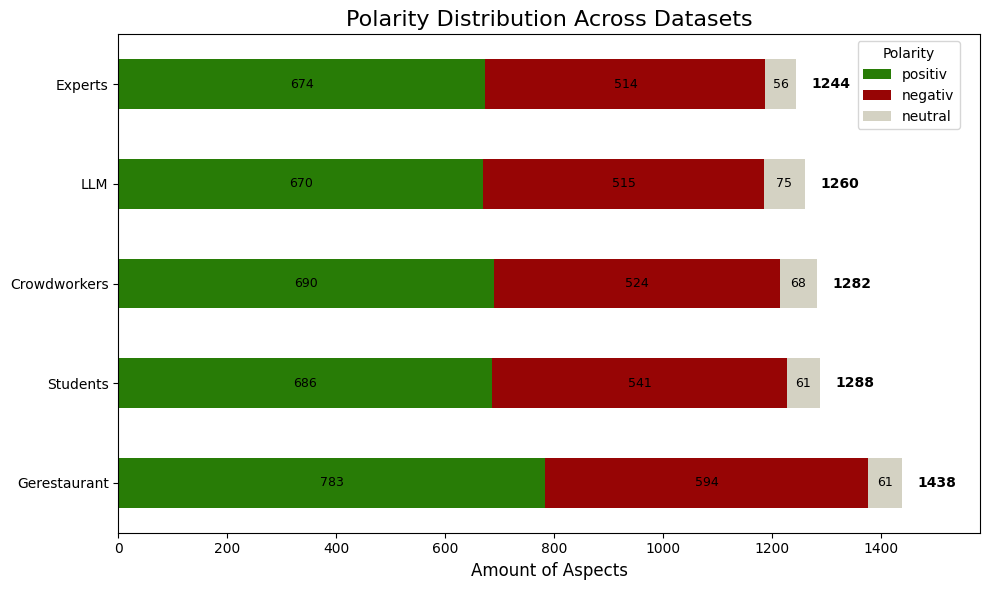

In [10]:
# Prepare polarity sums (positiv/negativ/neutral already exist)
df_polarity = df.copy()
df_polarity = df_polarity[df_polarity["name"] != "students"]
df_polarity = df_polarity.groupby("name")[["positiv", "negativ", "neutral"]].sum()

# Custom colors (green = positiv, red = negativ, grey = neutral)
colors = ["#287c06", "#970505", "#d4d2c3"]

# Rename datasets
df_polarity = df_polarity.rename(index=dataset_names)

# Sort datasets by total aspects
df_polarity = df_polarity.loc[df_polarity.sum(axis=1).sort_values(ascending=False).index]

# Max value for axis scaling
max_val = df_polarity.sum(axis=1).max()
display(df_polarity)
# Plot horizontal stacked bar chart
ax = df_polarity.plot(kind="barh", stacked=True, figsize=(10, 6), color=colors)

# Add numbers inside bar segments
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=9)

# Add totals at the end of bars
for i, total in enumerate(df_polarity.sum(axis=1)):
    ax.text(
        total + max_val * 0.02,  # dynamic offset (2% of max value)
        i,
        str(total),
        va='center',
        fontsize=10,
        fontweight='bold'
    )

# Styling
plt.xlim(0, max_val * 1.1)
plt.title("Polarity Distribution Across Datasets", fontsize=16)
plt.xlabel("Amount of Aspects", fontsize=12)
plt.ylabel("")
plt.legend(title="Polarity", bbox_to_anchor=(0.85, 1), loc="upper left")
plt.tight_layout()
plt.show()
